In [1]:
# load dependencies
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetOrdersRequest
# from alpaca.trading.enums import QueryOrderStatus
from alpaca.trading.enums import OrderStatus
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

True

In [2]:
# Alpaca API credentials
API_KEY = os.getenv("APCA-API-KEY-ID")
SECRET_KEY = os.getenv("APCA-API-SECRET-KEY")
print(API_KEY)
print(SECRET_KEY)

# Initialize client
client = TradingClient(API_KEY, SECRET_KEY, paper=True)

PKM2HBCP59DVCIC5GZDC
XNm0ZsGhmWoebli2Tkl0dEOSYtvuhX6OQNa4GBHI


In [3]:
# Set specific date (YYYY-MM-DD format)
target_date = "2025-02-27"  # Change this to the desired date


In [4]:
# Define the start and end times in ISO 8601 format
start_date = f"{target_date}T00:00:00Z"
end_date = f"{target_date}T23:59:59Z"

# can be "open", "closed", "all"
order_status = "closed"

# Create a GetOrdersRequest object with the desired parameters
orders_request = GetOrdersRequest(
    status=order_status,  # Fetch orders with any status
    after=start_date,
    until=end_date,
)

# Fetch orders using the TradingClient
orders = client.get_orders(filter=orders_request)

print(len(orders))

# Convert results to DataFrame
orders_data = [order.dict() for order in orders]
df = pd.DataFrame(orders_data)

# Display first few rows
df.head()

50


/tmp/ipykernel_2798/3984133583.py:21: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  orders_data = [order.dict() for order in orders]


,id,client_order_id,created_at,updated_at,submitted_at,filled_at,expired_at,expires_at,canceled_at,failed_at,...,limit_price,stop_price,status,extended_hours,legs,trail_percent,trail_price,hwm,position_intent,ratio_qty
0,84c2de89-00d1-464f-b2d4-6d3ff73b7208,87ddd17f-41e0-453f-a8f9-5b859663a733,2025-02-27 19:42:14.658092+00:00,2025-02-27 19:42:16.605129+00:00,2025-02-27 19:42:14.672123+00:00,2025-02-27 19:42:16.603211+00:00,None,2025-02-27 21:00:00+00:00,None,None,...,None,None,OrderStatus.FILLED,False,None,None,None,None,PositionIntent.SELL_TO_CLOSE,None
1,dccc2ca0-3726-4dd2-84e6-6edac2a1c759,da4bf3a5-af4c-422b-9641-a4162d533dd4,2025-02-27 19:42:14.588237+00:00,2025-02-27 19:42:15.831160+00:00,2025-02-27 19:42:14.592621+00:00,2025-02-27 19:42:15.829268+00:00,None,2025-02-27 21:00:00+00:00,None,None,...,None,None,OrderStatus.FILLED,False,None,None,None,None,PositionIntent.SELL_TO_CLOSE,None
2,59a244a2-99da-4411-8503-105cc960ad7a,63dedf59-512b-42b0-b368-b312737f6cd3,2025-02-27 19:16:08.932201+00:00,2025-02-27 19:16:09.213874+00:00,2025-02-27 19:16:08.950186+00:00,2025-02-27 19:16:09.211361+00:00,None,2025-02-27 21:00:00+00:00,None,None,...,None,None,OrderStatus.FILLED,False,None,None,None,None,PositionIntent.SELL_TO_CLOSE,None
3,89cb69ae-2999-4be5-a725-2c3a505adf3f,14f870e4-b65f-4b10-a458-fd6bd98012c8,2025-02-27 19:14:07.256437+00:00,2025-02-27 19:14:08.013062+00:00,2025-02-27 19:14:07.264156+00:00,2025-02-27 19:14:08.011193+00:00,None,2025-02-27 21:00:00+00:00,None,None,...,None,None,OrderStatus.FILLED,False,None,None,None,None,PositionIntent.BUY_TO_OPEN,None
4,5314e5bf-b531-4706-b824-f14af5c9dc19,0a5cdfec-cffd-4926-a820-07393e45baf9,2025-02-27 19:11:06.503187+00:00,2025-02-27 19:11:07.247562+00:00,2025-02-27 19:11:06.507318+00:00,2025-02-27 19:11:07.245970+00:00,None,2025-02-27 21:00:00+00:00,None,None,...,None,None,OrderStatus.FILLED,False,None,None,None,None,PositionIntent.SELL_TO_CLOSE,None


In [5]:
df_filled = df[df["status"] == "filled"]

In [6]:
df_sorted = df_filled.sort_values(by="created_at", ascending=True)

In [7]:
# ✅ Convert to numeric before aggregation
df_sorted["filled_qty"] = pd.to_numeric(df_sorted["filled_qty"], errors="coerce")
df_sorted["filled_avg_price"] = pd.to_numeric(df_sorted["filled_avg_price"], errors="coerce")

# 🔄 Group by 'symbol' and aggregate
df_grouped = df_sorted.groupby("symbol").agg(
    total_quantity=("filled_qty", "sum"),  # Sum of filled quantities
    avg_price=("filled_avg_price", "mean"),  # Average fill price
    num_orders=("id", "count")  # Total number of orders
).reset_index()

print(df_grouped)

  symbol  total_quantity   avg_price  num_orders
0  GOOGL            1197  170.975748          21
1   MSFT             384  397.541146          16
2   NVDA             175  126.669829           7
3   TSLA              54  285.513889           6


In [8]:
# Initialize lists to store results
pnl_results = []
matched_trades = []  # Stores raw matched transactions

# Process each ticker separately
for symbol, group in df_sorted.groupby("symbol"):
    long_positions = []  # FIFO queue for buy → sell
    short_positions = []  # FIFO queue for sell → buy
    total_pnl = 0
    trade_count = 0

    for _, row in group.iterrows():
        qty = row["filled_qty"]
        price = row["filled_avg_price"]
        side = row["side"]  # 'buy' or 'sell'
        created_at = row["created_at"]

        if side == "buy":
            if short_positions:
                # Cover short position first (sell → buy)
                remaining_qty = qty
                while remaining_qty > 0 and short_positions:
                    sell_qty, sell_price, sell_time = short_positions.pop(0)
                    matched_qty = min(sell_qty, remaining_qty)
                    pnl = matched_qty * (sell_price - price)  # Profit = (Short Sell Price - Cover Price) * Qty
                    total_pnl += pnl
                    trade_count += 1
                    remaining_qty -= matched_qty

                    # Save matched trade pair
                    matched_trades.append({
                        "symbol": symbol,
                        "trade_type": "short_cover",
                        "sell_time": sell_time,
                        "sell_price": sell_price,
                        "buy_time": created_at,
                        "buy_price": price,
                        "quantity": matched_qty,
                        "pnl": pnl
                    })

                    # If sell order still has remaining qty, put it back
                    if sell_qty > matched_qty:
                        short_positions.insert(0, (sell_qty - matched_qty, sell_price, sell_time))

                # If there's any remaining qty, store as a new long position
                if remaining_qty > 0:
                    long_positions.append((remaining_qty, price, created_at))
            else:
                # Store as a new long position (buy → sell)
                long_positions.append((qty, price, created_at))

        elif side == "sell":
            if long_positions:
                # Close long position first (buy → sell)
                remaining_qty = qty
                while remaining_qty > 0 and long_positions:
                    buy_qty, buy_price, buy_time = long_positions.pop(0)
                    matched_qty = min(buy_qty, remaining_qty)
                    pnl = matched_qty * (price - buy_price)  # Profit = (Sell Price - Buy Price) * Qty
                    total_pnl += pnl
                    trade_count += 1
                    remaining_qty -= matched_qty

                    # Save matched trade pair
                    matched_trades.append({
                        "symbol": symbol,
                        "trade_type": "long_close",
                        "buy_time": buy_time,
                        "buy_price": buy_price,
                        "sell_time": created_at,
                        "sell_price": price,
                        "quantity": matched_qty,
                        "pnl": pnl
                    })

                    # If buy order still has remaining qty, put it back
                    if buy_qty > matched_qty:
                        long_positions.insert(0, (buy_qty - matched_qty, buy_price, buy_time))

                # If there's any remaining qty, store as a new short position
                if remaining_qty > 0:
                    short_positions.append((remaining_qty, price, created_at))
            else:
                # Store as a new short position (sell → buy)
                short_positions.append((qty, price, created_at))

    avg_pnl = total_pnl / trade_count if trade_count > 0 else 0

    pnl_results.append({
        "symbol": symbol,
        "total_pnl": total_pnl,
        "avg_pnl_per_trade": avg_pnl,
        "trade_count": trade_count
    })

# Convert results to DataFrames
df_pnl = pd.DataFrame(pnl_results)
df_matched_trades = pd.DataFrame(matched_trades)

# Print and save results
print(df_pnl)
df_pnl.to_csv("pnl_summary.csv", index=False)
df_matched_trades.to_csv("matched_trades.csv", index=False)

  symbol  total_pnl  avg_pnl_per_trade  trade_count
0  GOOGL -47.219997          -4.722000           10
1   MSFT -33.939984          -4.242498            8
2   NVDA  -7.720000          -2.573333            3
3   TSLA -19.129995          -6.376665            3


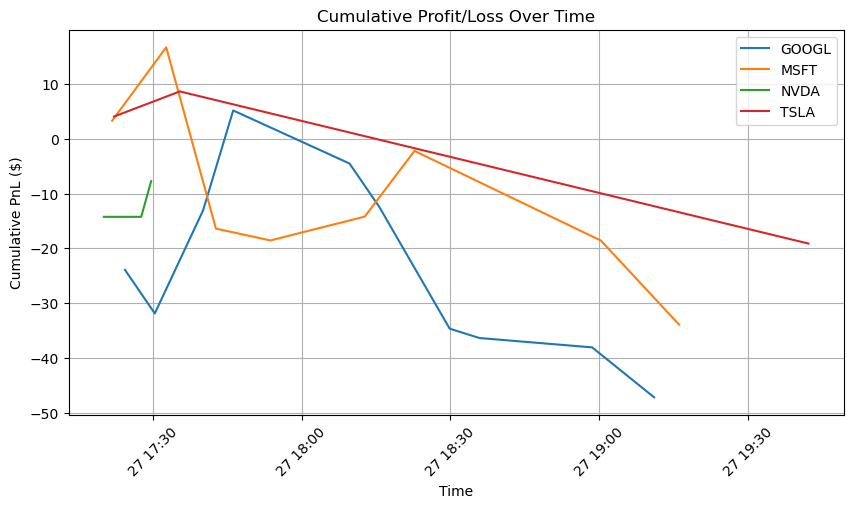

/tmp/ipykernel_2798/1200583840.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_matched_trades, x="symbol", y="pnl", hue="trade_type", ci=None)


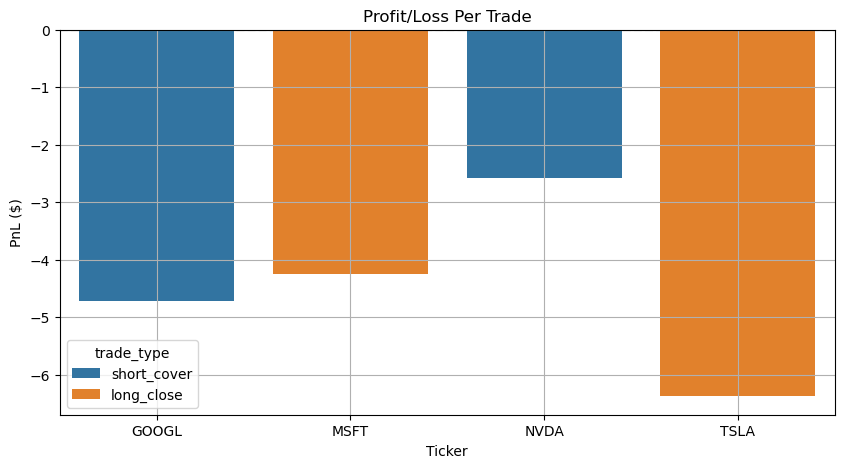

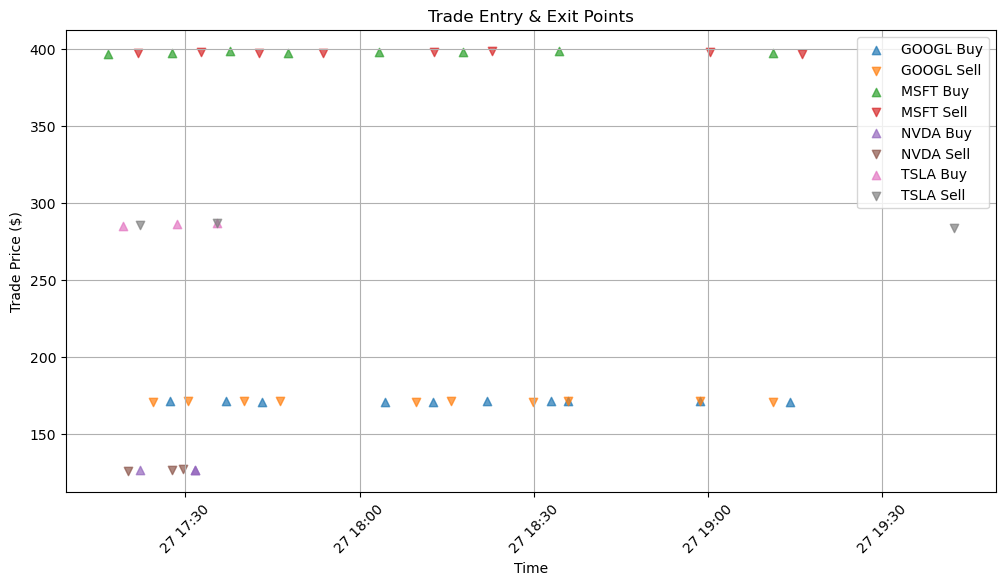

In [9]:
# Ensure timestamps are properly formatted
df_matched_trades["buy_time"] = pd.to_datetime(df_matched_trades["buy_time"])
df_matched_trades["sell_time"] = pd.to_datetime(df_matched_trades["sell_time"])

# Cumulative PnL Over Time for Each Ticker
plt.figure(figsize=(10, 5))

for symbol in df_matched_trades["symbol"].unique():
    ticker_trades = df_matched_trades[df_matched_trades["symbol"] == symbol].sort_values("sell_time")
    ticker_trades["cumulative_pnl"] = ticker_trades["pnl"].cumsum()
    
    plt.plot(ticker_trades["sell_time"], ticker_trades["cumulative_pnl"], label=symbol)

plt.xlabel("Time")
plt.ylabel("Cumulative PnL ($)")
plt.title("Cumulative Profit/Loss Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Profit/Loss Per Trade (Bar Chart)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_matched_trades, x="symbol", y="pnl", hue="trade_type", ci=None)

plt.xlabel("Ticker")
plt.ylabel("PnL ($)")
plt.title("Profit/Loss Per Trade")
plt.axhline(0, color="gray", linestyle="--")
plt.grid()
plt.show()

# Trade Entry & Exit Points (Scatter Plot)
plt.figure(figsize=(12, 6))

for symbol in df_matched_trades["symbol"].unique():
    ticker_trades = df_matched_trades[df_matched_trades["symbol"] == symbol]

    plt.scatter(ticker_trades["buy_time"], ticker_trades["buy_price"], label=f"{symbol} Buy", marker="^", alpha=0.7)
    plt.scatter(ticker_trades["sell_time"], ticker_trades["sell_price"], label=f"{symbol} Sell", marker="v", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Trade Price ($)")
plt.title("Trade Entry & Exit Points")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()